In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [4]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
df['Source'].unique()

array(['Source2', 'Source3', 'Source1'], dtype=object)

In [10]:
df['Severity'].unique()

array([3, 2, 1, 4])

In [11]:
df['City'].value_counts()
#most accident is in miami

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [12]:
df['Country'].unique()

array(['US'], dtype=object)

In [13]:
df['Severity'].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

In [14]:
(df['Temperature(F)']>20).sum()# accident is in more warmer areas

7397172

In [15]:
df['City'].value_counts().head()

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: count, dtype: int64

In [16]:
newdf = df.select_dtypes(include='number')

In [17]:
newdf.columns


Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [18]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   End_Lat            float64
 4   End_Lng            float64
 5   Distance(mi)       float64
 6   Temperature(F)     float64
 7   Wind_Chill(F)      float64
 8   Humidity(%)        float64
 9   Pressure(in)       float64
 10  Visibility(mi)     float64
 11  Wind_Speed(mph)    float64
 12  Precipitation(in)  float64
dtypes: float64(12), int64(1)
memory usage: 766.5 MB


In [19]:
len(newdf.columns)

13

In [20]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [21]:
df[df['Street'].isna()]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
512237,A-512251,Source2,3,2022-09-08 06:50:49,2022-09-08 07:20:00,26.053434,-80.162338,NaN,NaN,0.000,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
512280,A-512302,Source2,2,2022-09-08 06:11:28,2022-09-08 07:10:34,28.232574,-81.648674,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Day
512453,A-512485,Source2,3,2022-09-08 13:41:23,2022-09-08 14:49:00,41.348206,-81.649940,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
512787,A-512861,Source2,1,2022-09-08 08:08:36,2022-09-08 08:53:08,35.782158,-78.572304,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
512931,A-513027,Source2,1,2022-09-08 07:45:45,2022-09-08 08:30:29,34.247910,-80.582878,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6928152,A-6977455,Source1,2,2020-10-31 03:32:00,2020-10-31 06:47:19,25.851613,-80.208145,25.844353,-80.207065,0.506,...,False,False,False,False,False,False,Night,Night,Night,Night
7063579,A-7112911,Source1,2,2020-03-12 13:34:00,2020-03-12 15:07:28,34.011977,-117.443303,34.011977,-117.443303,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7588503,A-7637871,Source1,2,2018-01-25 21:23:32,2018-01-26 03:23:32,39.420444,-76.643656,39.419341,-76.641375,0.144,...,False,False,False,False,False,False,Night,Night,Night,Night
7601453,A-7650821,Source1,2,2017-12-20 17:47:52,2017-12-20 18:17:52,32.840287,-79.860482,32.839979,-79.861404,0.058,...,False,False,False,False,True,False,NaN,NaN,NaN,NaN


**percent of missing value**

In [22]:
df.isna().sum().sum()

12840498

In [23]:
df.isna().sum().sum()/ (df.shape[0] * df.shape[1])

0.036118922103294065

In [24]:
missing_percentage = df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100


In [25]:
missing_percentage

3.6118922103294064

In [26]:
type(missing_percentage)

numpy.float64

In [27]:
len(df['City'].unique()) #there are 13679 cities

13679

In [28]:
df['City'].value_counts().index

Index(['Miami', 'Houston', 'Los Angeles', 'Charlotte', 'Dallas', 'Orlando',
       'Austin', 'Raleigh', 'Nashville', 'Baton Rouge',
       ...
       'Stennis Space Center', 'Piseco', 'Rich', 'Ela', 'Gerrardstown',
       'Benkelman', 'Old Appleton', 'Wildrose', 'Mc Nabb',
       'American Fork-Pleasant Grove'],
      dtype='object', name='City', length=13678)

In [29]:
df['City'].value_counts()#accidents per city

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [30]:
df[df['City']=='New York']

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
194401,A-194408,Source2,2,2016-12-01 08:21:11,2016-12-01 08:50:48,40.770107,-73.957397,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
194415,A-194422,Source2,3,2016-12-01 08:49:35,2016-12-01 09:19:14,40.849579,-73.942314,NaN,NaN,1.130,...,False,False,False,False,False,False,Day,Day,Day,Day
194468,A-194475,Source2,2,2016-12-01 12:08:26,2016-12-01 12:37:55,40.748028,-73.968170,NaN,NaN,0.010,...,False,False,True,False,False,False,Day,Day,Day,Day
194533,A-194540,Source2,2,2016-12-02 05:19:11,2016-12-02 05:49:02,40.761723,-73.982803,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Night,Night
194551,A-194558,Source3,2,2016-12-02 07:09:04,2016-12-02 07:38:36,40.782818,-73.943871,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726396,A-7775764,Source1,2,2019-08-20 14:54:26,2019-08-20 15:23:31,40.737500,-73.974270,40.739760,-73.972910,0.172,...,False,False,False,False,False,False,Day,Day,Day,Day
7726942,A-7776310,Source1,2,2019-08-21 17:32:29,2019-08-21 18:01:32,40.850020,-73.943992,40.853290,-73.960640,0.899,...,False,False,False,False,False,False,Day,Day,Day,Day
7727478,A-7776846,Source1,2,2019-08-22 08:16:10,2019-08-22 08:44:59,40.760390,-73.962860,40.752581,-73.944912,1.083,...,False,False,False,False,False,False,Day,Day,Day,Day
7727498,A-7776866,Source1,2,2019-08-22 15:14:32,2019-08-22 15:44:00,40.748080,-73.967930,40.751223,-73.965275,0.258,...,False,False,False,False,False,False,Day,Day,Day,Day


In [31]:
df[df['City']=='New York'].count()[0]

/tmp/ipykernel_34/1026141124.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['City']=='New York'].count()[0]


21699

In [32]:
df[df['City']=='New York'].shape[0]

21699

In [33]:
len(df[df['City'] == 'New York'])

21699

In [34]:
df['City'].str.contains('York').any()# that means new york is present

True

In [35]:
mycity=(df['City'].value_counts()).sort_values(ascending=False)

In [36]:
mycity=mycity[:20]

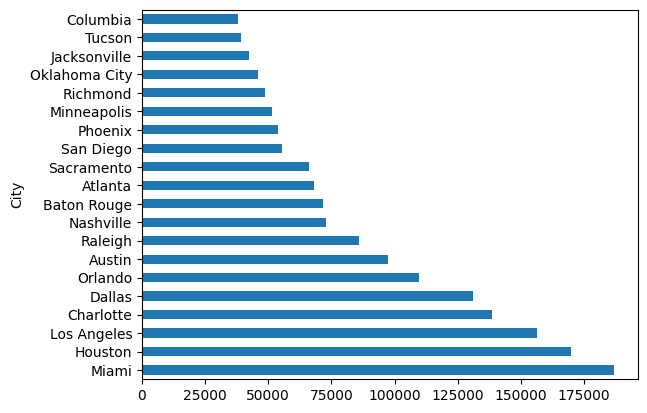

In [37]:
mycity.plot(kind='barh')
plt.show()

In [38]:
df[df['Temperature(F)']<0 ]['City'].unique().shape[0]
# 1671 city are those where accident happend when temp was less than 0 f

1671

In [39]:

"""import pandas as pd

data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago'],
    'Temperature(F)': [-5, 32, -10, 10, -15]
}

df = pd.DataFrame(data)


num_unique_cities = df[df['Temperature(F)'] < 0]['City'].unique().shape[0]
print(num_unique_cities)



Summary:
The expression df[df['Temperature(F)'] < 0]['City'].unique().shape[0] correctly returns the number of unique cities where the temperature is below 0°F.
"""



"import pandas as pd\n\ndata = {\n    'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago'],\n    'Temperature(F)': [-5, 32, -10, 10, -15]\n}\n\ndf = pd.DataFrame(data)\n\n\nnum_unique_cities = df[df['Temperature(F)'] < 0]['City'].unique().shape[0]\nprint(num_unique_cities)\n\n\n\nSummary:\nThe expression df[df['Temperature(F)'] < 0]['City'].unique().shape[0] correctly returns the number of unique cities where the temperature is below 0°F.\n"

In [40]:
mycity1=(df['City'].value_counts()).sort_values(ascending=False)

/tmp/ipykernel_34/2452741250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mycity1)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


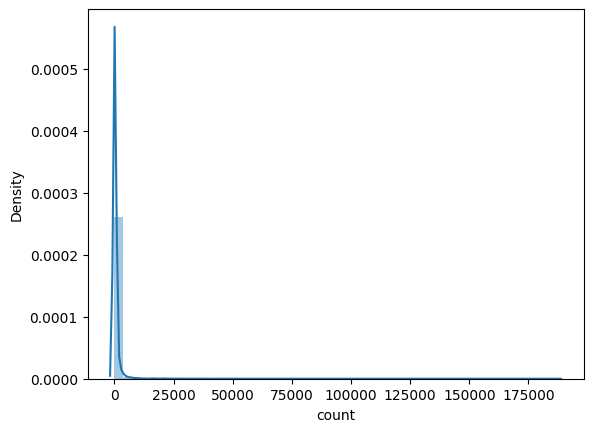

In [41]:
sns.distplot(mycity1)
plt.show()

In [42]:
(mycity1>1000).value_counts()# means there only 1215 cities are where accident is more prone

count
False    12463
True      1215
Name: count, dtype: int64

In [43]:
len(mycity1[mycity1>1000])

1215

In [44]:
mycity1[mycity1>1000].shape[0]

1215

In [45]:
low=mycity1[mycity1<=1000]

/tmp/ipykernel_34/566419953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

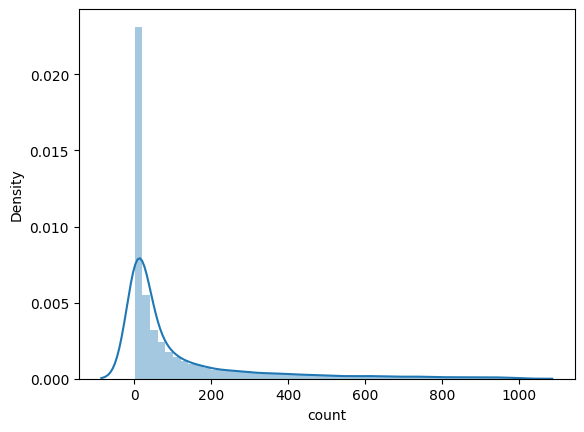

In [46]:
sns.distplot(low)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

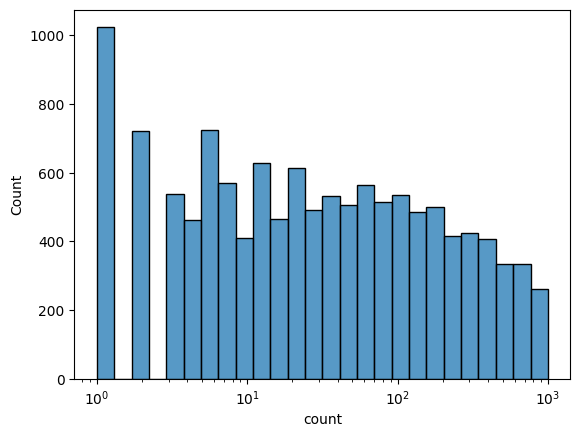

In [47]:
sns.histplot(low,log_scale=True)#means most of the cities having 1 accident

In [48]:
mycity1[mycity1<=1].shape[0]# 1023 cities are the one who having accident less than or equal to 1

1023

In [49]:
mycity1[mycity1==1000]

City
Bennettsville    1000
Berwyn           1000
Zephyrhills      1000
Name: count, dtype: int64

In [50]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [63]:
df['Date_time']=pd.to_datetime(df['Start_Time'],errors='coerce')

In [64]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_time,year,month,day,time
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016.0,2.0,8.0,05:46:00
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,Night,Night,Night,Day,2016-02-08 06:07:59,2016.0,2.0,8.0,06:07:59
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,Night,Night,Day,Day,2016-02-08 06:49:27,2016.0,2.0,8.0,06:49:27
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,Night,Day,Day,Day,2016-02-08 07:23:34,2016.0,2.0,8.0,07:23:34
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,Day,Day,Day,Day,2016-02-08 07:39:07,2016.0,2.0,8.0,07:39:07


In [53]:
df['Date_time'].dtype

dtype('<M8[ns]')

In [54]:
df['year']=df['Date_time'].dt.year

In [55]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_time,year
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,Night,Night,Night,Day,2016-02-08 06:07:59,2016.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,True,False,Night,Night,Day,Day,2016-02-08 06:49:27,2016.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,Night,Day,Day,Day,2016-02-08 07:23:34,2016.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,True,False,Day,Day,Day,Day,2016-02-08 07:39:07,2016.0


In [56]:
df['month']=df['Date_time'].dt.month
df['day']=df['Date_time'].dt.day

In [57]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_time,year,month,day
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016.0,2.0,8.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,Night,Night,Night,Day,2016-02-08 06:07:59,2016.0,2.0,8.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,True,False,Night,Night,Day,Day,2016-02-08 06:49:27,2016.0,2.0,8.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,Night,Day,Day,Day,2016-02-08 07:23:34,2016.0,2.0,8.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,True,False,Day,Day,Day,Day,2016-02-08 07:39:07,2016.0,2.0,8.0


In [58]:
df['time'] = df['Date_time'].dt.time


In [59]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_time,year,month,day,time
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016.0,2.0,8.0,05:46:00
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,Night,Night,Night,Day,2016-02-08 06:07:59,2016.0,2.0,8.0,06:07:59
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,Night,Night,Day,Day,2016-02-08 06:49:27,2016.0,2.0,8.0,06:49:27
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,Night,Day,Day,Day,2016-02-08 07:23:34,2016.0,2.0,8.0,07:23:34
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,Day,Day,Day,Day,2016-02-08 07:39:07,2016.0,2.0,8.0,07:39:07


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 51 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             object        
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [67]:
df['Starttttttttt_Time']=pd.to_datetime(df['Start_Time'], format='mixed')

In [68]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_time,year,month,day,time,Starttttttttt_Time
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,Night,2016-02-08 05:46:00,2016.0,2.0,8.0,05:46:00,2016-02-08 05:46:00
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Night,Day,2016-02-08 06:07:59,2016.0,2.0,8.0,06:07:59,2016-02-08 06:07:59
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Night,Day,Day,2016-02-08 06:49:27,2016.0,2.0,8.0,06:49:27,2016-02-08 06:49:27
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Night,Day,Day,Day,2016-02-08 07:23:34,2016.0,2.0,8.0,07:23:34,2016-02-08 07:23:34
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,Day,2016-02-08 07:39:07,2016.0,2.0,8.0,07:39:07,2016-02-08 07:39:07


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             object        
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [70]:
df.drop(columns=['Date_time','year','month','day','time'],inplace=True)

In [71]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Starttttttttt_Time
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,2016-02-08 05:46:00
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,2016-02-08 06:07:59
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,2016-02-08 06:49:27
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,2016-02-08 07:23:34
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,2016-02-08 07:39:07


In [72]:
df.rename(columns={'Starttttttttt_Time': 'Start_time'}, inplace=True)


In [73]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,2016-02-08 05:46:00
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,2016-02-08 06:07:59
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,2016-02-08 06:49:27
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,2016-02-08 07:23:34
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,2016-02-08 07:39:07


In [74]:
df['Year']=df['Start_time'].dt.year

In [75]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,Night,Night,Night,Day,2016-02-08 06:07:59,2016
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,True,False,Night,Night,Day,Day,2016-02-08 06:49:27,2016
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,Night,Day,Day,Day,2016-02-08 07:23:34,2016
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,True,False,Day,Day,Day,Day,2016-02-08 07:39:07,2016


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 48 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             object        
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [78]:
df['Start_time'][0]

Timestamp('2016-02-08 05:46:00')

In [79]:
df['Month']=df['Start_time'].dt.month

In [80]:
df['Day']=df['Start_time'].dt.day

In [81]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016,2,8
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,Night,Night,Night,Day,2016-02-08 06:07:59,2016,2,8
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,True,False,Night,Night,Day,Day,2016-02-08 06:49:27,2016,2,8
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,Night,Day,Day,Day,2016-02-08 07:23:34,2016,2,8
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,True,False,Day,Day,Day,Day,2016-02-08 07:39:07,2016,2,8


In [82]:
df['Time']=df['Start_time'].dt.time

In [83]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016,2,8,05:46:00
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,Night,Night,Night,Day,2016-02-08 06:07:59,2016,2,8,06:07:59
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,Night,Night,Day,Day,2016-02-08 06:49:27,2016,2,8,06:49:27
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,Night,Day,Day,Day,2016-02-08 07:23:34,2016,2,8,07:23:34
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,Day,Day,Day,Day,2016-02-08 07:39:07,2016,2,8,07:39:07


In [84]:
df['Time'][0]

datetime.time(5, 46)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 51 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             object        
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [89]:
df[df['ID']=='A-1']

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016,2,8,05:46:00


In [92]:
df.iloc[2332]

ID                                                                  A-2333
Source                                                             Source2
Severity                                                                 2
Start_Time                                             2016-07-07 00:19:43
End_Time                                               2016-07-07 01:19:43
Start_Lat                                                        38.601826
Start_Lng                                                      -121.505997
End_Lat                                                                NaN
End_Lng                                                                NaN
Distance(mi)                                                           0.0
Description              #2 lane blocked due to accident on Jedediah Sm...
Street                                       Jedediah Smith Recreation Trl
City                                                            Sacramento
County                   

In [93]:
df.loc[2323]

ID                                                                  A-2324
Source                                                             Source2
Severity                                                                 2
Start_Time                                             2016-07-06 22:40:12
End_Time                                               2016-07-06 23:25:12
Start_Lat                                                         39.09087
Start_Lng                                                      -123.220879
End_Lat                                                                NaN
End_Lng                                                                NaN
Distance(mi)                                                           0.0
Description              Accident on Robinson Creek Rd at CA-253 Boonvi...
Street                                                        Boonville Rd
City                                                                 Ukiah
County                   

In [94]:
ls

In [95]:
df['Hour']=df['Start_time'].dt.hour

In [96]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time,Hour
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,Night,2016-02-08 05:46:00,2016,2,8,05:46:00,5
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Night,Day,2016-02-08 06:07:59,2016,2,8,06:07:59,6
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Night,Day,Day,2016-02-08 06:49:27,2016,2,8,06:49:27,6
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Night,Day,Day,Day,2016-02-08 07:23:34,2016,2,8,07:23:34,7
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,Day,2016-02-08 07:39:07,2016,2,8,07:39:07,7


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


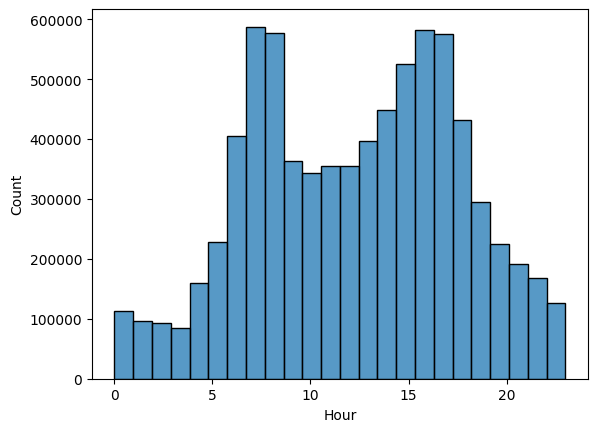

In [103]:
sns.histplot(df['Hour'],bins=24)
plt.show()# mostly accidents sre from morning 6 to 8 and 3 to 6 in the evening

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Count'>

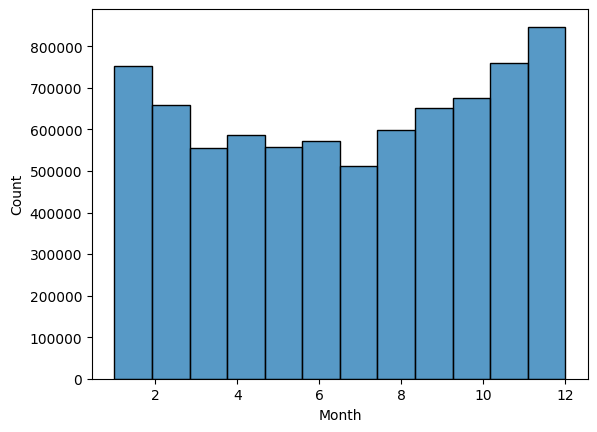

In [100]:
sns.histplot(df['Month'],bins=12)

In [104]:
df['Day_of_week']=df['Start_time'].dt.dayofweek

In [105]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time,Hour,Day_of_week
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,2016-02-08 05:46:00,2016,2,8,05:46:00,5,0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Day,2016-02-08 06:07:59,2016,2,8,06:07:59,6,0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Day,Day,2016-02-08 06:49:27,2016,2,8,06:49:27,6,0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Day,Day,Day,2016-02-08 07:23:34,2016,2,8,07:23:34,7,0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,2016-02-08 07:39:07,2016,2,8,07:39:07,7,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Day_of_week', ylabel='Count'>

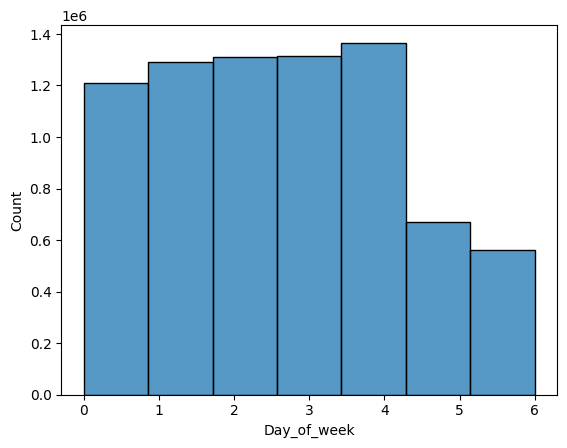

In [106]:
sns.histplot(df['Day_of_week'],bins=7)

In [107]:
df[df['Day_of_week']==6]['Hour']

135        10
136        10
137        10
138        18
139        19
           ..
7726136    22
7726137    23
7726252    22
7726253    22
7726292    22
Name: Hour, Length: 562744, dtype: int32

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hour', ylabel='Count'>

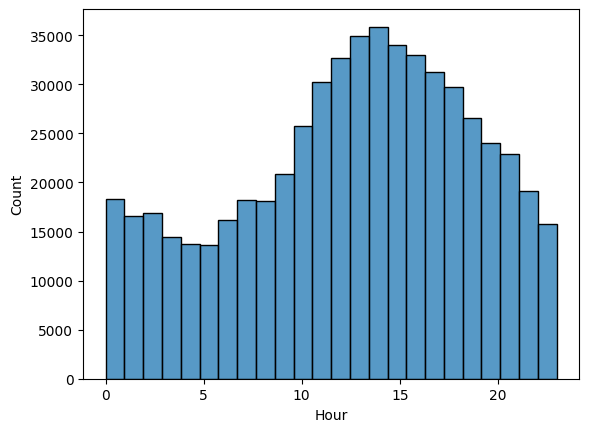

In [108]:
sns.histplot(df[df['Day_of_week']==6]['Hour'],bins=24)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hour', ylabel='Count'>

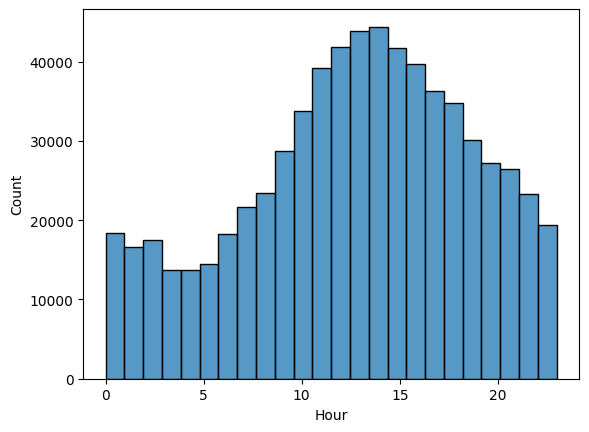

In [109]:
sns.histplot(df[df['Day_of_week']==5]['Hour'],bins=24)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hour', ylabel='Count'>

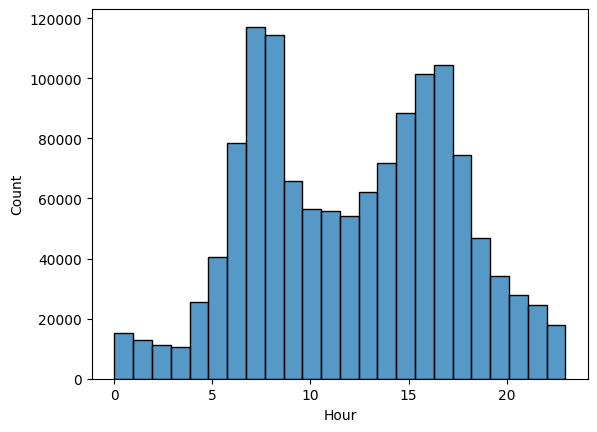

In [111]:
sns.histplot(df[df['Day_of_week']==2]['Hour'],bins=24)

ab isse to ye smjh aa rhi h ki sat aur sun ko accident dophar mein hote hain aur baaki din subah aur shaam ko

In [115]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time,Hour,Day_of_week
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,2016-02-08 05:46:00,2016,2,8,05:46:00,5,0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Day,2016-02-08 06:07:59,2016,2,8,06:07:59,6,0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Day,Day,2016-02-08 06:49:27,2016,2,8,06:49:27,6,0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Day,Day,Day,2016-02-08 07:23:34,2016,2,8,07:23:34,7,0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,2016-02-08 07:39:07,2016,2,8,07:39:07,7,0


In [116]:
df[(df['Day_of_week']==0 )&(df['Severity']==4)]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time,Hour,Day_of_week
4143,A-4144,Source2,4,2016-07-25 14:23:33,2016-07-25 15:11:13,37.339115,-121.851807,NaN,NaN,0.000,...,Day,Day,Day,2016-07-25 14:23:33,2016,7,25,14:23:33,14,0
4964,A-4965,Source2,4,2016-08-01 07:44:37,2016-08-01 08:29:37,37.710648,-122.166687,NaN,NaN,0.000,...,Day,Day,Day,2016-08-01 07:44:37,2016,8,1,07:44:37,7,0
31878,A-31879,Source2,4,2016-03-28 19:33:11,2016-03-28 20:18:11,38.596363,-122.601372,NaN,NaN,0.010,...,Day,Day,Day,2016-03-28 19:33:11,2016,3,28,19:33:11,19,0
52865,A-52866,Source2,4,2016-08-01 07:49:43,2016-08-01 08:19:43,33.987732,-118.398964,NaN,NaN,0.000,...,Day,Day,Day,2016-08-01 07:49:43,2016,8,1,07:49:43,7,0
71767,A-71774,Source2,4,2016-11-14 08:02:16,2016-11-14 08:46:00,34.027458,-118.274490,NaN,NaN,0.010,...,Day,Day,Day,2016-11-14 08:02:16,2016,11,14,08:02:16,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726166,A-7775534,Source1,4,2019-08-19 19:07:48,2019-08-19 19:35:58,47.603039,-122.333209,47.602312,-122.332552,0.059,...,Day,Day,Day,2019-08-19 19:07:48,2019,8,19,19:07:48,19,0
7726182,A-7775550,Source1,4,2019-08-19 20:26:30,2019-08-19 20:55:53,47.601750,-122.334170,47.601720,-122.331990,0.102,...,Day,Day,Day,2019-08-19 20:26:30,2019,8,19,20:26:30,20,0
7726183,A-7775551,Source1,4,2019-08-19 20:26:30,2019-08-19 20:55:53,47.601720,-122.331990,47.601750,-122.334170,0.102,...,Day,Day,Day,2019-08-19 20:26:30,2019,8,19,20:26:30,20,0
7726318,A-7775686,Source1,4,2019-08-19 16:40:56,2019-08-19 17:08:20,33.738891,-117.083932,33.738940,-117.081976,0.112,...,Day,Day,Day,2019-08-19 16:40:56,2019,8,19,16:40:56,16,0


In [117]:
df[df['Day_of_week']==0]['Severity']

0          3
1          2
2          2
3          3
4          2
          ..
7726332    3
7726333    3
7726696    2
7726697    2
7726698    2
Name: Severity, Length: 1210921, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Severity', ylabel='Count'>

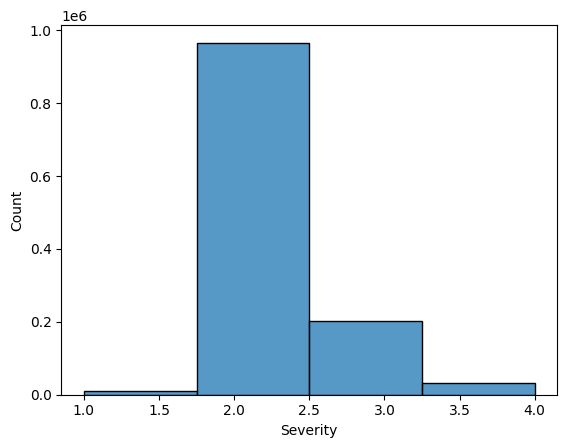

In [119]:
sns.histplot(df[df['Day_of_week']==0]['Severity'],bins=4)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Severity', ylabel='Count'>

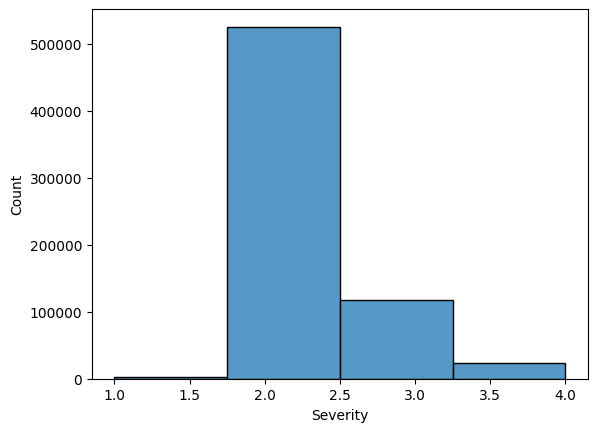

In [123]:
sns.histplot(df[df['Day_of_week']==5]['Severity'],bins=4)

most of the days severity of accident is of 2

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Severity', ylabel='Count'>

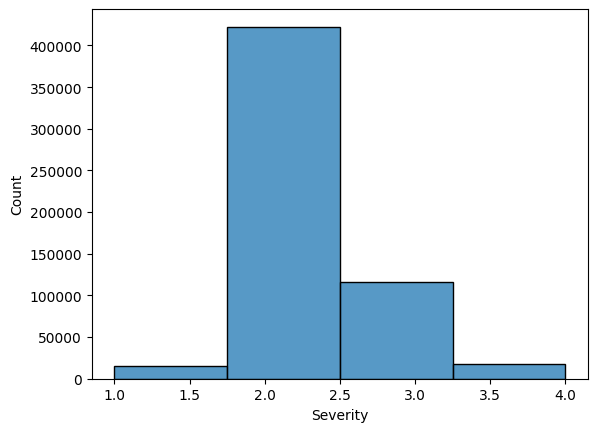

In [125]:
sns.histplot(df[df['Month']==6]['Severity'],bins=4)

In [126]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time,Hour,Day_of_week
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,2016-02-08 05:46:00,2016,2,8,05:46:00,5,0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Day,2016-02-08 06:07:59,2016,2,8,06:07:59,6,0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Day,Day,2016-02-08 06:49:27,2016,2,8,06:49:27,6,0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Day,Day,Day,2016-02-08 07:23:34,2016,2,8,07:23:34,7,0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,2016-02-08 07:39:07,2016,2,8,07:39:07,7,0


In [127]:
df[['Start_Lat','Start_Lng']]

,Start_Lat,Start_Lng
0,39.865147,-84.058723
1,39.928059,-82.831184
2,39.063148,-84.032608
3,39.747753,-84.205582
4,39.627781,-84.188354
...,...,...
7728389,34.002480,-117.379360
7728390,32.766960,-117.148060
7728391,33.775450,-117.847790
7728392,33.992460,-118.403020


In [134]:
df_sampled = df.sample(frac=0.001, random_state=42)

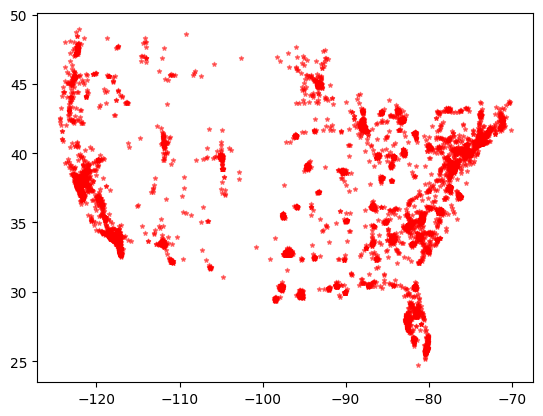

In [142]:
plt.scatter(df_sampled['Start_Lng'], df_sampled['Start_Lat'], c='red', marker='*', alpha=0.5,s=9)

this show that accident is more prone to the coastal cities

In [143]:
df.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Start_time', 'Year', 'Month', 'Day', 'Time',
       'Hour', 'Day_of_week'],
      dtype='object')

In [144]:
df['City'].value_counts()

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [158]:
df_miami=df[df['City']=='Miami']

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time,Hour,Day_of_week
116057,A-116064,Source2,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 16:40:31,2016,11,30,16:40:31,16,2
116060,A-116067,Source2,2,2016-11-30 15:16:19,2016-11-30 17:01:03,25.963093,-80.185677,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 15:16:19,2016,11,30,15:16:19,15,2
116061,A-116068,Source2,2,2016-11-30 16:55:31,2016-11-30 17:25:11,25.841373,-80.322037,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 16:55:31,2016,11,30,16:55:31,16,2
116062,A-116069,Source2,3,2016-11-30 16:57:23,2016-11-30 17:27:10,25.812199,-80.205856,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 16:57:23,2016,11,30,16:57:23,16,2
116064,A-116071,Source2,2,2016-11-30 17:15:52,2016-11-30 17:45:36,25.781235,-80.337181,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 17:15:52,2016,11,30,17:15:52,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727615,A-7776983,Source1,2,2019-08-22 17:10:33,2019-08-22 17:38:17,25.707554,-80.285429,25.708083,-80.284736,0.057,...,Day,Day,Day,2019-08-22 17:10:33,2019,8,22,17:10:33,17,3
7727616,A-7776984,Source1,4,2019-08-22 17:12:48,2019-08-22 17:42:07,25.909390,-80.209870,25.912360,-80.209700,0.205,...,Day,Day,Day,2019-08-22 17:12:48,2019,8,22,17:12:48,17,3
7728042,A-7777410,Source1,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,...,Night,Night,Night,2019-08-23 02:01:46,2019,8,23,02:01:46,2,4
7728056,A-7777424,Source1,2,2019-08-23 13:08:31,2019-08-23 13:37:40,25.812250,-80.237460,25.812460,-80.243590,0.382,...,Day,Day,Day,2019-08-23 13:08:31,2019,8,23,13:08:31,13,4


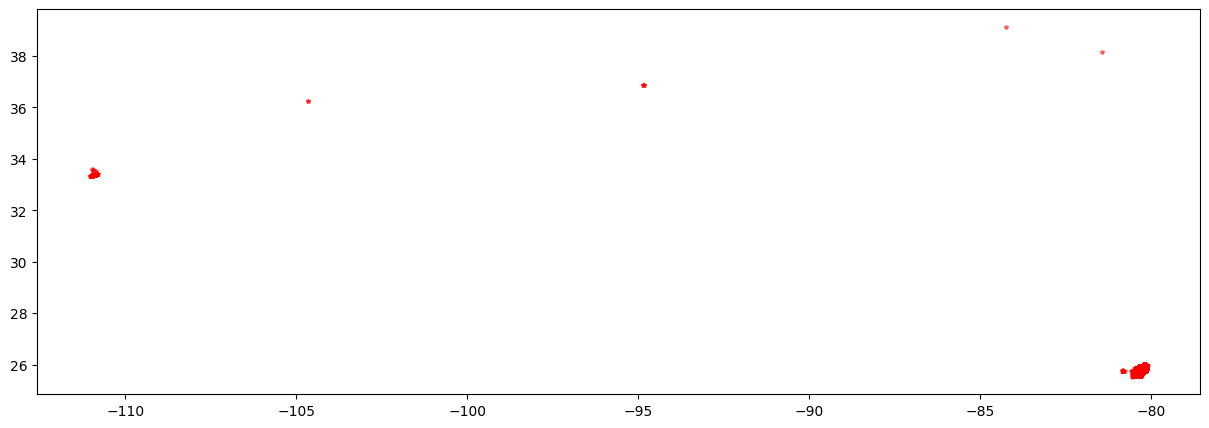

In [147]:
plt.figure(figsize=(15,5))
plt.scatter(df_miami['Start_Lng'], df_miami['Start_Lat'], c='red', marker='*', alpha=0.5,s=9)
plt.show()

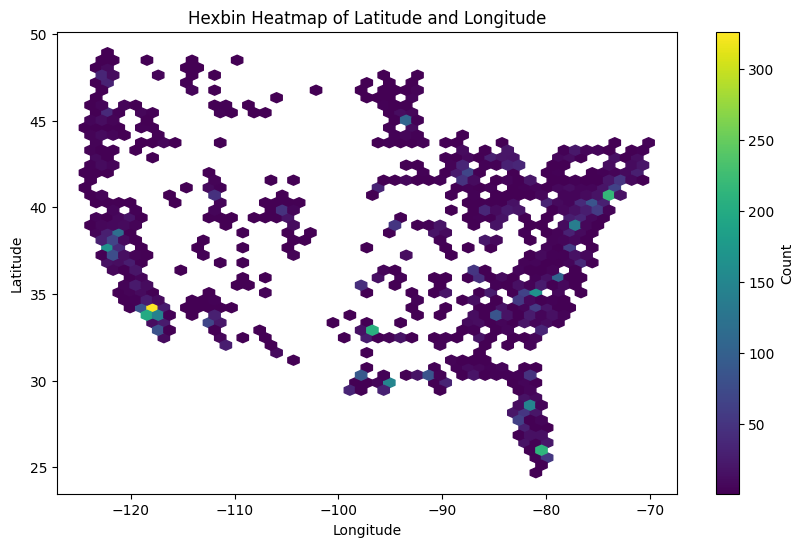

In [153]:
import matplotlib.pyplot as plt

# Create the hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df_sampled['Start_Lng'], df_sampled['Start_Lat'], gridsize=50, cmap='viridis', mincnt=1)

# Add color bar
plt.colorbar(label='Count')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Heatmap of Latitude and Longitude')

# Show the plot
plt.show()


In [156]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time,Hour,Day_of_week
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,2016-02-08 05:46:00,2016,2,8,05:46:00,5,0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Day,2016-02-08 06:07:59,2016,2,8,06:07:59,6,0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Day,Day,2016-02-08 06:49:27,2016,2,8,06:49:27,6,0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Day,Day,Day,2016-02-08 07:23:34,2016,2,8,07:23:34,7,0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,2016-02-08 07:39:07,2016,2,8,07:39:07,7,0


In [159]:
df_miami

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_time,Year,Month,Day,Time,Hour,Day_of_week
116057,A-116064,Source2,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 16:40:31,2016,11,30,16:40:31,16,2
116060,A-116067,Source2,2,2016-11-30 15:16:19,2016-11-30 17:01:03,25.963093,-80.185677,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 15:16:19,2016,11,30,15:16:19,15,2
116061,A-116068,Source2,2,2016-11-30 16:55:31,2016-11-30 17:25:11,25.841373,-80.322037,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 16:55:31,2016,11,30,16:55:31,16,2
116062,A-116069,Source2,3,2016-11-30 16:57:23,2016-11-30 17:27:10,25.812199,-80.205856,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 16:57:23,2016,11,30,16:57:23,16,2
116064,A-116071,Source2,2,2016-11-30 17:15:52,2016-11-30 17:45:36,25.781235,-80.337181,NaN,NaN,0.010,...,Day,Day,Day,2016-11-30 17:15:52,2016,11,30,17:15:52,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727615,A-7776983,Source1,2,2019-08-22 17:10:33,2019-08-22 17:38:17,25.707554,-80.285429,25.708083,-80.284736,0.057,...,Day,Day,Day,2019-08-22 17:10:33,2019,8,22,17:10:33,17,3
7727616,A-7776984,Source1,4,2019-08-22 17:12:48,2019-08-22 17:42:07,25.909390,-80.209870,25.912360,-80.209700,0.205,...,Day,Day,Day,2019-08-22 17:12:48,2019,8,22,17:12:48,17,3
7728042,A-7777410,Source1,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,...,Night,Night,Night,2019-08-23 02:01:46,2019,8,23,02:01:46,2,4
7728056,A-7777424,Source1,2,2019-08-23 13:08:31,2019-08-23 13:37:40,25.812250,-80.237460,25.812460,-80.243590,0.382,...,Day,Day,Day,2019-08-23 13:08:31,2019,8,23,13:08:31,13,4


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Count'>

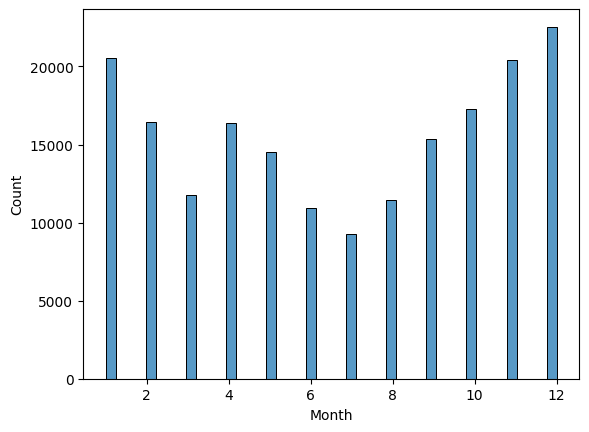

In [161]:
sns.histplot(df_miami['Month'])

In [164]:
df['City'].value_counts().head()

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: count, dtype: int64